# Deep Computer Vision Using Convolutional Neural Network

In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [41]:
def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")
    
def plot_color_image(image):
    plt.imshow(image, interpolation="nearest")
    plt.axis("off")

## The Architecture of the Visual Cortex

## Convolutional Layers

### Filters

### Stacking Multiple Feature Maps

### TensorFlow Implementation

In TensorFlow, each input image is represented as a 3D Tensor of shape [*height, width, channels*]. A mini-batch is represented as a 4D Tensor of shape [*mini-batch size, height, width, channels*]. The weights of the convolutional layer are represented as a 4D tensor of shape [*$f_h,f_w, f_{n'}, f_n$*]. 

The bias term of a convolutional layer are simply represented as a 1D tensor of shape [*$f_n$*].

The following code load two color images, then create two filters and applies them to both images, and finally displays one of the resulting feature maps.

In [11]:
from sklearn.datasets import load_sample_image

# Load sample images
china = load_sample_image("china.jpg") / 255
flower = load_sample_image("flower.jpg") / 255
images = np.array([china, flower])
batch_size, height, width, channels = images.shape

In [17]:
china

array([[[0.68235294, 0.78823529, 0.90588235],
        [0.68235294, 0.78823529, 0.90588235],
        [0.68235294, 0.78823529, 0.90588235],
        ...,
        [0.98039216, 0.98431373, 1.        ],
        [0.98039216, 0.98431373, 1.        ],
        [0.98039216, 0.98431373, 1.        ]],

       [[0.6745098 , 0.78039216, 0.89803922],
        [0.67843137, 0.78431373, 0.90196078],
        [0.67843137, 0.78431373, 0.90196078],
        ...,
        [0.98431373, 0.98823529, 1.        ],
        [0.98431373, 0.98823529, 1.        ],
        [0.98431373, 0.98823529, 1.        ]],

       [[0.68235294, 0.78823529, 0.90588235],
        [0.68235294, 0.78823529, 0.90588235],
        [0.68235294, 0.78823529, 0.90588235],
        ...,
        [0.98823529, 0.99215686, 1.        ],
        [0.98823529, 0.99215686, 1.        ],
        [0.98823529, 0.99215686, 1.        ]],

       ...,

       [[0.34509804, 0.31372549, 0.02745098],
        [0.57647059, 0.54117647, 0.27058824],
        [0.47843137, 0

In [18]:
china.shape

(427, 640, 3)

Image has 427 slices. With each slice having 640 rows and 3 columns.

In [12]:
# create 2 filters
filters = np.zeros(shape=(7,7, channels, 2), dtype=np.float32)

In [21]:
filters

array([[[[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[1., 0.],
         [1., 0.],
         [1., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]]],


       [[[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[1., 0.],
         [1., 0.],
         [1., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]]],


       [[[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 

In [22]:
filters.shape

(7, 7, 3, 2)

[Quite Simple and intutive explanation on how 4D array works](https://stackoverflow.com/a/47143492/16273741)

So basically [7, 7, 3, 2] is a 7x7 matrix which contains matrices of each matrix having shape 3x2.

In [28]:
filters[:, 3, :, 0] = 1 # vertical line
filters[3, :, :, 1] = 1 # horizontal line

Cross verifying that 0th index of all the matrices of 3rd column of 7x7 matrix has been changed to 1.

In [29]:
filters[:, 3]

array([[[1., 0.],
        [1., 0.],
        [1., 0.]],

       [[1., 0.],
        [1., 0.],
        [1., 0.]],

       [[1., 0.],
        [1., 0.],
        [1., 0.]],

       [[1., 1.],
        [1., 1.],
        [1., 1.]],

       [[1., 0.],
        [1., 0.],
        [1., 0.]],

       [[1., 0.],
        [1., 0.],
        [1., 0.]],

       [[1., 0.],
        [1., 0.],
        [1., 0.]]], dtype=float32)

Cross verifying that 1st index of all the matrices of 3rd row of 7x7 matrix has been changed to 1.

In [31]:
filters[3, :]

array([[[0., 1.],
        [0., 1.],
        [0., 1.]],

       [[0., 1.],
        [0., 1.],
        [0., 1.]],

       [[0., 1.],
        [0., 1.],
        [0., 1.]],

       [[1., 1.],
        [1., 1.],
        [1., 1.]],

       [[0., 1.],
        [0., 1.],
        [0., 1.]],

       [[0., 1.],
        [0., 1.],
        [0., 1.]],

       [[0., 1.],
        [0., 1.],
        [0., 1.]]], dtype=float32)

In [32]:
outputs = tf.nn.conv2d(images, filters, strides=1, padding="SAME")

In `tf.nn.conv2d`:

- `images` is the input mini-batch (a 4D Tensor)
- `filters` is set of filters to apply (also a 4D Tensor)
- `strides` is equal to 1, but it could also be a 1D array with four elements, where two central elements are the vertical ahd horizontal strides ($s_h$ and $s_w$). The first and last elements must be equal to 1. They may one day be used to specify a batch stride (to skip some instances) and a channel stride (to skip some of the previous layer's feature maps or channels).
- `padding` must be either `"same"` or `"valid"`:
    - If set to `"same"`, the convolutional layer uses zero padding if necessary. When `strides=1`, the layer's outputs will have the same spatial dimenstions (width and height) as its inputs, hence the name `same`.
    - If set to `"valid"`, the convolutional layer does not use zero padding and may ignore some rows and columns at bottom and right of the input image, depending on the stride. 
    
    
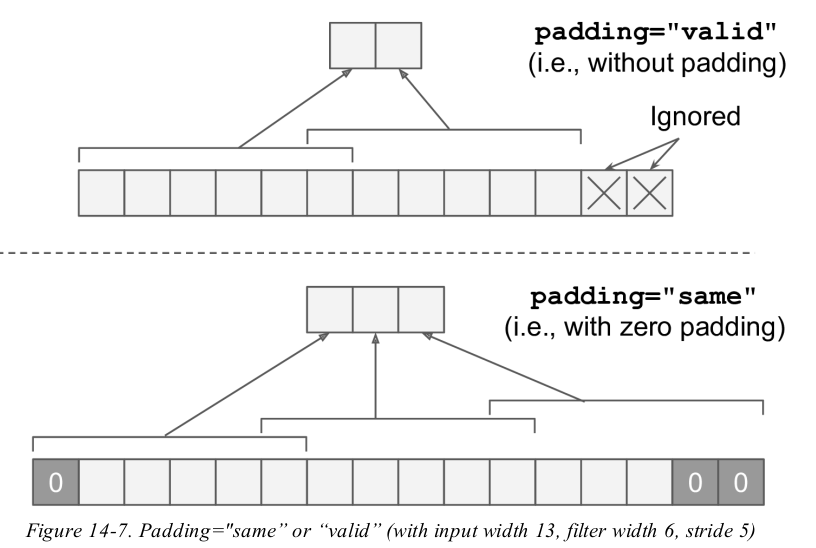

In [33]:
outputs.shape

TensorShape([2, 427, 640, 2])

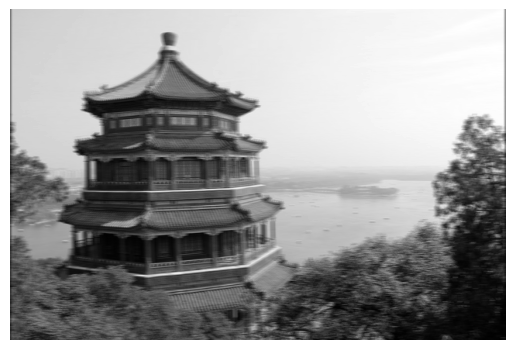

In [35]:
plt.imshow(outputs[0, :, :, 1], cmap="gray") # plot 1st images 2nd feature map.
plt.axis("off")
plt.show()

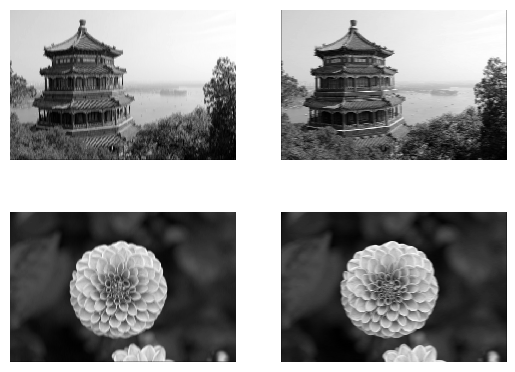

In [42]:
for image_index in (0, 1):
    for feature_map_index in (0, 1):
        plt.subplot(2, 2, image_index * 2 + feature_map_index + 1)
        plot_image(outputs[image_index, :, :, feature_map_index])
        
plt.show()

In [44]:
def crop(images):
    return images[150:200, 130:250]

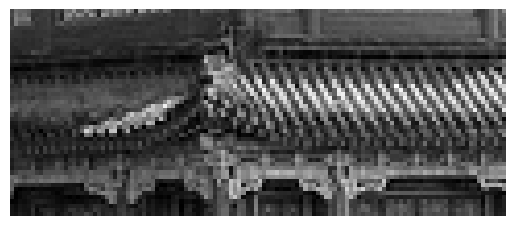

In [45]:
plot_image(crop(images[0, :, :, 0]))
plt.show()

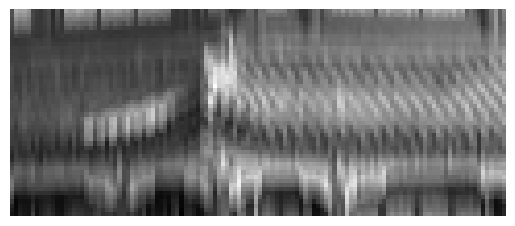

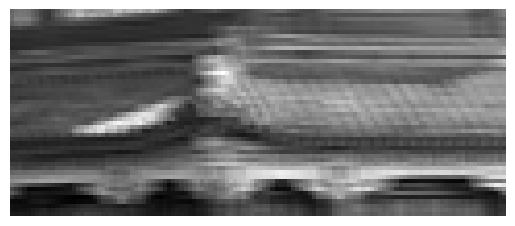

In [48]:
for feature_map_index, name in enumerate(["china_vertical", "china_horizontal"]):
    plot_image(crop(outputs[0, :, :, feature_map_index]))
    plt.show()

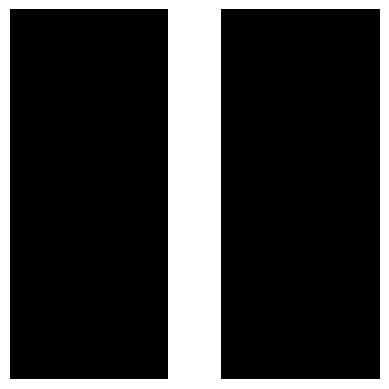

In [49]:
plot_image(filters[:, :, 0, 0])

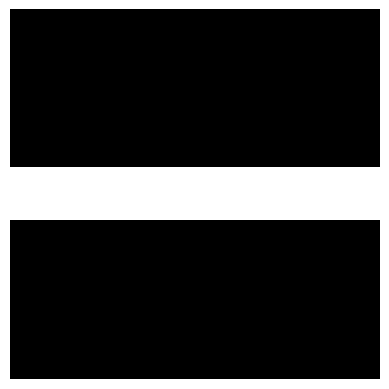

In [50]:
plot_image(filters[:, :, 0, 1])

In this example we manually defined the filters, but in real CNN we would normally define filters as trainable so the neural net can learn which filter works best. Instead of manually creating the variables, use the `keras.layers.Conv2D` layer:

In [51]:
conv = keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, padding="same", activation="relu")

This code creates a Conv2D layer with 32 filters, each 3x3, using a stride of 1 (both horizontally and vertically) and "same" padding, and applying the ReLU activation function to its outputs. 

Convolutional layers has quite a few hyperparameters: we must choose the number of filters, their height and width, the strides and the padding type. 

### Memory Requirements